In [62]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [63]:
x_train = x_train/255
x_test = x_test/255
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [64]:
x_train = x_train.reshape((x_train.shape[0],-1)).T
x_test = x_test.reshape((x_test.shape[0],-1)).T
print(x_train.shape)
print(x_test.shape)

(784, 60000)
(784, 10000)


In [65]:
m_train = y_train.shape[0]
m_test = y_test.shape[0]

ytr = np.zeros((10,m_train))
yte = np.zeros((10,m_test))

for i in range(m_train):
    ytr[y_train[i],i]=1

for i in range(m_test):
    yte[y_test[i],i]=1
    
y_train = ytr
y_test = yte

In [66]:
def softmax(x):
    x = np.exp(x)/np.sum(np.exp(x),axis=0)
    return x

In [67]:
def relu(x):
    x = np.maximum(0,x)
    return x

In [68]:
def initialize(layer_dims):
    parameters = {}
    np.random.seed(2303)
    l = len(layer_dims)
    for i in range(1,l):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*0.01
        parameters['b'+str(i)] = np.zeros((layer_dims[i],1))
    return parameters

In [69]:
def forward_propagation(X,parameters):
    cache = {}
    cache["A"+str(0)] = X
    L = len(parameters)//2
    
    for l in range(1,L):
        cache["Z"+str(l)] = np.dot(parameters["W"+str(l)],cache["A"+str(l-1)]) + parameters["b"+str(l)];
        cache["A"+str(l)] = relu(cache["Z"+str(l)])
        
    cache["Z"+str(L)] = np.dot(parameters["W"+str(L)],cache["A"+str(L-1)]) + parameters["b"+str(L)];
    cache["A"+str(L)] = softmax(cache["Z"+str(L)])
    return cache

In [70]:
def relu_der(z):
    x = 1*(z>0)
    return x

In [71]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = (-1/m)*np.sum(Y*np.log(AL))
    cost = np.squeeze(cost)
    return cost

In [72]:
def back_propagation(y,cache,parameters):
    l = len(parameters)//2
    m = y.shape[1]
    grads = {}
    grads["dZ"+str(l)] = cache["A"+str(l)]-y
    
    for i in reversed(range(l)):
            grads["dW"+str(i+1)] = (1/m)*np.dot(grads["dZ"+str(i+1)],cache["A"+str(i)].T)
            grads["db"+str(i+1)] = (1/m)*np.sum(grads["dZ"+str(i+1)],axis=1,keepdims=True)
            if(i==0):
                break
            grads["dA"+str(i)] = np.dot(parameters["W"+str(i+1)].T,grads["dZ"+str(i+1)])
            grads["dZ"+str(i)] = grads["dA"+str(i)]*relu_der(cache["Z"+str(i)])
    
    return grads

In [73]:
def update_params(parameters,grads,alpha):
    l = len(parameters)//2
    for i in range(1,l+1):
        parameters["W"+str(i)] = parameters["W"+str(i)] - alpha*grads["dW"+str(i)]
        parameters["b"+str(i)] = parameters["b"+str(i)] - alpha*grads["db"+str(i)]
    return parameters                                                              

In [83]:
def model(x,y,layer_dims,alpha,num_iters):
    
    parameters = initialize(layer_dims)
    l = len(parameters)//2
    costs = []
    for i in range(num_iters):
        cache = forward_propagation(x,parameters)
        
        cost = compute_cost(cache["A"+str(l)],y)
        
        grads = back_propagation(y,cache,parameters)
        
        parameters = update_params(parameters,grads,alpha)
        
        if(i%50 == 0):
            print("cost after iteration " + str(i) + ": "+str(cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    return parameters

cost after iteration 0: 2.3024995842968847
cost after iteration 50: 2.226218606661201
cost after iteration 100: 1.3082979645230166
cost after iteration 150: 0.784864935114677
cost after iteration 200: 0.5912836748043107
cost after iteration 250: 0.49712824631817204
cost after iteration 300: 0.4438567876221499
cost after iteration 350: 0.41020275958614616
cost after iteration 400: 0.38700261183924634
cost after iteration 450: 0.36982967681807305
cost after iteration 500: 0.35639652655556486
cost after iteration 550: 0.3454142396494651
cost after iteration 600: 0.3361308903601157
cost after iteration 650: 0.328054392249505
cost after iteration 700: 0.3209023669003121
cost after iteration 750: 0.3144390159170673
cost after iteration 800: 0.30854561416591186
cost after iteration 850: 0.30311644584674113
cost after iteration 900: 0.29808229472128206
cost after iteration 950: 0.2933656004954972


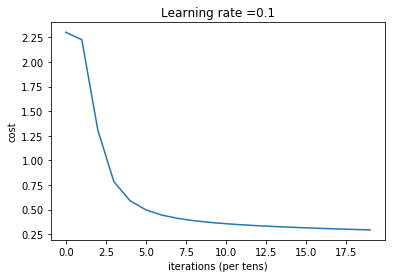

In [85]:
parameters = model(x_train,y_train,[28*28,25,10],0.1,1000)

In [86]:
def predict(X, Y):
    cache = forward_propagation(X, parameters)
    l = len(parameters)//2
    #use AL and Y to get the accuracy
    AL = cache["A"+str(l)]
    AL = (AL == AL.max(axis=0))*1
    m = AL.shape[1]
    accuracy = (100/m)*np.sum(np.logical_and(AL,Y))
    print(str(accuracy)+"%")

    return accuracy

In [87]:
predict(x_test, y_test)

92.0%


92.0

In [88]:
predict(x_train, y_train)

91.83833333333334%


91.83833333333334